# Classifying books genre to technical and non-technical on the basis of their book covers

In this notebook we create a dataset of book covers from images.google.com and train a classifier on it

We will train a classifier which classify the book covers into following categories
1. Technical
2. Non-Technical

In [262]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

## How to get images from google?

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Technical book covers, "technical book covers", it might be a good idea to exclude other variants:

    "technical book covers" -"non technical book covers"

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Create directory and downloading the images

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [17]:
path = Path('data/book_cover')

In [18]:
folder = 'technical'
file = 'technical_urls.txt'

creating the technical folder

In [19]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

downloading the images to the technical folder

In [ ]:
download_images(path/file, dest)

In [24]:
folder = 'non-technical'
file = 'non-technical_urls.txt'

creating the non-technical folder

In [25]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [26]:
download_images(path/file, dest)

Error https://img.washingtonpost.com/rf/image_480w/2010-2019/WashingtonPost/2017/03/30/BookWorld/Images/HowToWinFriendsTeenGirls.jpg?uuid=s_iVNBVFEeetoBSJtzWzow HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


downloading the images to the non-technical folder

In [27]:
path.ls()

[PosixPath('data/book_cover/technical'),
 PosixPath('data/book_cover/technical_urls.txt'),
 PosixPath('data/book_cover/non_technical_urls.txt'),
 PosixPath('data/book_cover/non-technical'),
 PosixPath('data/book_cover/.ipynb_checkpoints')]

Cleaning images that cannot be removed:

In [30]:
classes = ['non-technical', 'technical',]

In [29]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=600)

non-technical


Image data/book_cover/non-technical/00000250.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000688.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000835.jpg'>
Image data/book_cover/non-technical/00000016.png has 4 instead of 3 channels
Image data/book_cover/non-technical/00000346.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000605.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000930.jpg'>
Image data/book_cover/non-technical/00000446.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000905.jpg'>
Image data/book_cover/non-technical/00000353.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000627.png'>
Image data/book_cover/non-t

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


Image data/book_cover/non-technical/00000503.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000699.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000815.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000715.jpg'>
Image data/book_cover/non-technical/00000176.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000361.jpg'>
Image data/book_cover/non-technical/00000557.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000611.jpg'>
Image data/book_cover/non-technical/00000624.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000655.jpg'>
Image data/book_cover/non-technical/00000002.png has 1 instead of 3 channels
Image data/book_cover/non-technical/00000281.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000851.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000774.jpg'>
Image data/book_cover/non-t

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


Image data/book_cover/non-technical/00000047.png has 4 instead of 3 channels
Image data/book_cover/non-technical/00000911.gif has 1 instead of 3 channels
Image data/book_cover/non-technical/00000239.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000692.jpg'>
Image data/book_cover/non-technical/00000946.gif has 1 instead of 3 channels
Image data/book_cover/non-technical/00000587.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000201.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000272.jpg'>
Image data/book_cover/non-technical/00000123.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/non-technical/00000224.jpg'>
Image data/book_cover/non-technical/00000852.gif

Image data/book_cover/technical/00000469.png has 1 instead of 3 channels
Image data/book_cover/technical/00000540.png has 4 instead of 3 channels
Image data/book_cover/technical/00000031.png has 4 instead of 3 channels
Image data/book_cover/technical/00000783.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000607.jpeg'>
Image data/book_cover/technical/00000744.jpg has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000791.png'>
Image data/book_cover/technical/00000468.jpg has 1 instead of 3 channels
Image data/book_cover/technical/00000765.png has 4 instead of 3 channels
Image data/book_cover/technical/00000412.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000870.jpg'>
Image data/book_cover/technical/00000631.png has 1 instead of 3 channels
Image data/book_cover/technical/00000084.png has 4 instead o

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000243.jpg'>
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000821.png'>
Image data/book_cover/technical/00000411.png has 1 instead of 3 channels
Image data/book_cover/technical/00000440.jpg has 1 instead of 3 channels
Image data/book_cover/technical/00000778.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000689.jpg'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000894.jpg'>
Image data/book_cover/technical/00000551.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000720.png'>
image file could not be identified because WEBP support not installed
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000370.png'>
Imag

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
Image data/book_cover/technical/00000775.png has 1 instead of 3 channels
Image data/book_cover/technical/00000476.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000158.jpg'>
Image data/book_cover/technical/00000807.png has 4 instead of 3 channels
Image data/book_cover/technical/00000205.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000827.png'>
cannot identify image file <_io.BufferedReader name='data/book_cover/technical/00000539.png'>
Image data/book_cover/technical/00000994.png has 4 instead of 3 channels
Image data/book_cover/technical/00000695.png has 4 instead of 3 channels
Image data/book_cover/technical/00000924.jpg has 4 instead of 3 channels
image file could not be identified because WEBP support not installed
Image data/book_cover/technical/00000067.png has 4 instead 

## Viewing the book covers

In [31]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(do_flip=False, max_rotate=0), size=224, num_workers=4).normalize(imagenet_stats)

Let's take a look at some of our pictures then.

In [32]:
data.classes

['non-technical', 'technical']

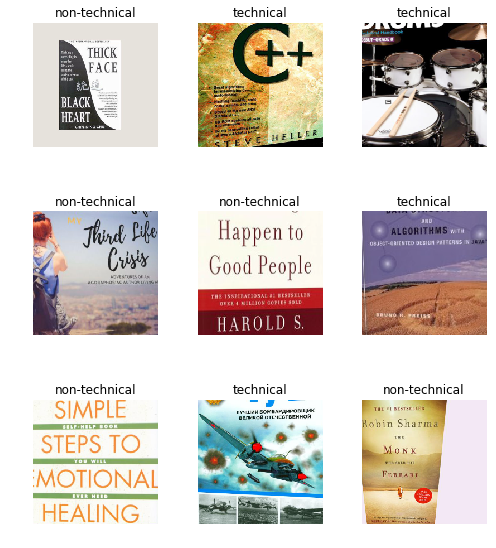

In [33]:
data.show_batch(rows=3, figsize=(7,8))

In [34]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non-technical', 'technical'], 2, 1404, 350)

## Let's train the model

let's do a transfer learning using a pretrained resnet 34 model 

In [35]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-03


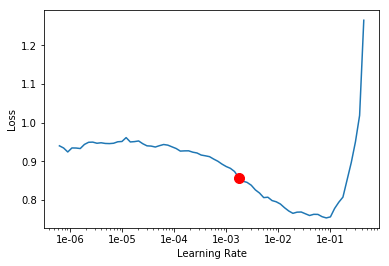

In [37]:
learn.recorder.plot()

In [38]:
lr = 1.74E-03

In [39]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.809049,0.495807,0.274286,0.725714
2,0.640320,0.512035,0.220000,0.780000
3,0.550164,0.504898,0.220000,0.780000
4,0.494571,0.503661,0.220000,0.780000


In [40]:
learn.save('stage-1')

In [41]:
learn.load('stage-1');

Unfreezing the pretrained layers

In [42]:
learn.unfreeze()

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


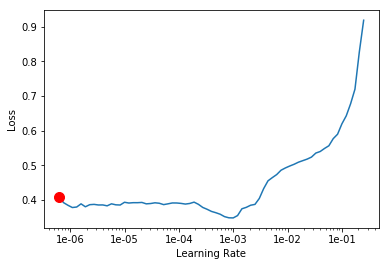

In [44]:
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.435818,0.450284,0.188571,0.811429
2,0.312612,0.405515,0.162857,0.837143


In [46]:
learn.save('stage-unfreeze-1')

In [47]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.140604,0.421055,0.162857,0.837143
2,0.110779,0.440228,0.151429,0.848571


In [48]:
learn.save('stage-unfreeze-2')

In [49]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.070183,0.637027,0.177143,0.822857
2,0.062504,0.520534,0.162857,0.837143


## Which book covers did the classifier failed to intepret?

In [50]:
learn.load('stage-unfreeze-2');

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

In [52]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

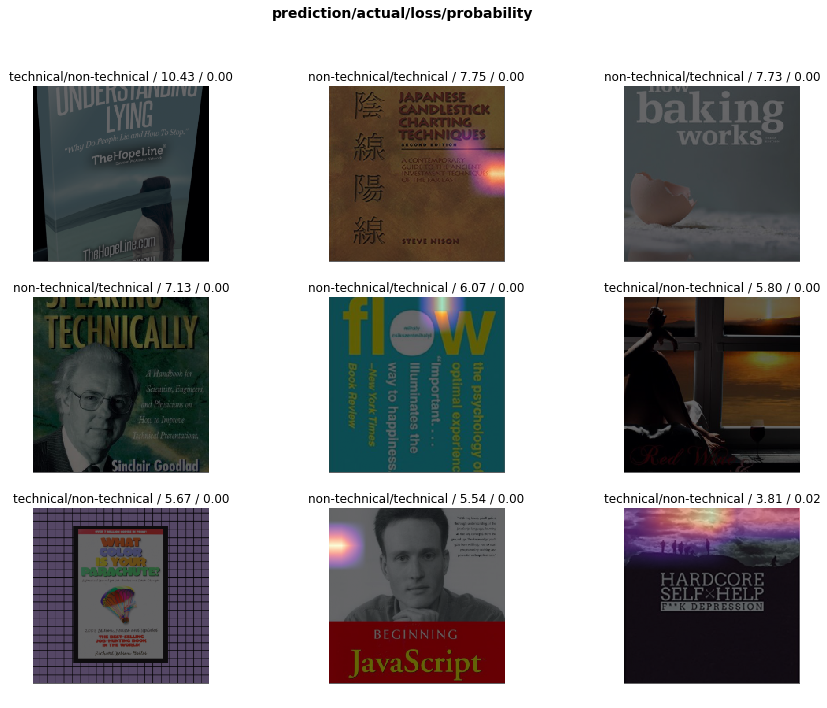

In [53]:
interp.plot_top_losses(9, figsize=(15,11))

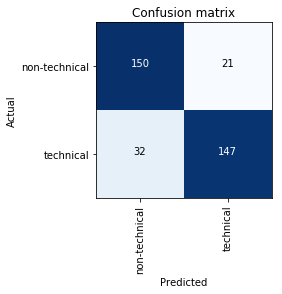

In [54]:
interp.plot_confusion_matrix()

As we can see the max accuracy we got is 84%. 

We found there is some overlap of design and color between two categories' book cover

If you want to go beyond this accuracy we have to extract text from images through OCR and do text classification

## Let's see the activations contributing to the classification

In [84]:
from fastai.callbacks.hooks import *

In [85]:
m = learn.model.eval();

In [254]:
x,y = data.train_ds[1026]

In [255]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [256]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [257]:
hook_a,hook_g = hooked_backward()

In [258]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 7, 7])

In [259]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([7, 7])

In [260]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

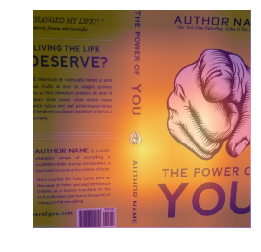

In [261]:
show_heatmap(avg_acts)